
# Titanic Data Analysis & Visualization Project
**Technologies:** NumPy, Pandas, Matplotlib, Seaborn  
**Description:** Final project notebook with data loading, cleaning, feature engineering, EDA, advanced visualizations, NumPy statistics, pivot tables, and conclusions.  
Dataset: Titanic (seaborn data repository)


In [1]:

# ------------------------------------------------
# 1. Import Libraries
# ------------------------------------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
sns.set_style("whitegrid")


In [2]:

# ------------------------------------------------
# 2. Load Dataset
# ------------------------------------------------
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv"
df = pd.read_csv(url)

print("Dataset Loaded Successfully ✅")
print("\nFirst 5 Rows:")
df.head()


Dataset Loaded Successfully ✅

First 5 Rows:


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:

# ------------------------------------------------
# 3. Basic Information
# ------------------------------------------------
print("\nShape of dataset:", df.shape)
print("\nColumn Names:", df.columns.tolist())
print("\nData Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())
print("\nStatistical Summary:\n")
df.describe(include="all")



Shape of dataset: (891, 15)

Column Names: ['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town', 'alive', 'alone']

Data Types:
 survived         int64
pclass           int64
sex             object
age            float64
sibsp            int64
parch            int64
fare           float64
embarked        object
class           object
who             object
adult_male        bool
deck            object
embark_town     object
alive           object
alone             bool
dtype: object

Missing Values:
 survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

Statistical Summary:



,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,889,891,891,891,203,889,891,891
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,3,2,7,3,2,2
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S,Third,man,True,C,Southampton,no,True
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,644,491,537,537,59,644,549,537
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:

# ------------------------------------------------
# 4. Data Cleaning
# ------------------------------------------------
df['age'] = df['age'].fillna(df['age'].median())
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])
df['embark_town'] = df['embark_town'].fillna(df['embark_town'].mode()[0])
df = df.drop(columns=['deck'])

print("\nMissing Values After Cleaning:\n", df.isnull().sum())


# Save cleaned dataset
df.to_csv("titanic_cleaned.csv", index=False)
print("✅ Cleaned dataset saved as titanic_cleaned.csv")



Missing Values After Cleaning:
 survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64
✅ Cleaned dataset saved as titanic_cleaned.csv


In [5]:

# ------------------------------------------------
# 5. Feature Engineering
# ------------------------------------------------
# Create new column: Family Size
df['family_size'] = df['sibsp'] + df['parch'] + 1

# Create new column: Alone or Not (1 = alone, 0 = with family)
df['alone'] = np.where(df['family_size'] == 1, 1, 0)

# Age categories
df['age_group'] = pd.cut(df['age'], bins=[0,12,18,35,50,80], 
                         labels=['Child','Teen','Young Adult','Middle Age','Senior'])

print("\nNew Columns Created: family_size, alone, age_group")
df[['age','family_size','alone','age_group']].head()



New Columns Created: family_size, alone, age_group


,age,family_size,alone,age_group
0,22.0,2,0,Young Adult
1,38.0,2,0,Middle Age
2,26.0,1,1,Young Adult
3,35.0,2,0,Young Adult
4,35.0,1,1,Young Adult


C:\Users\Atulya\AppData\Local\Temp\ipykernel_13924\2716916482.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="survived", data=df, palette="Set2")


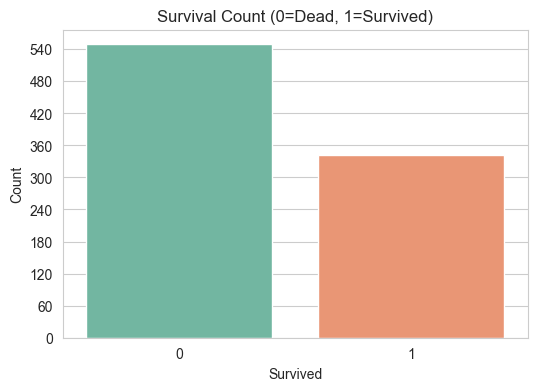

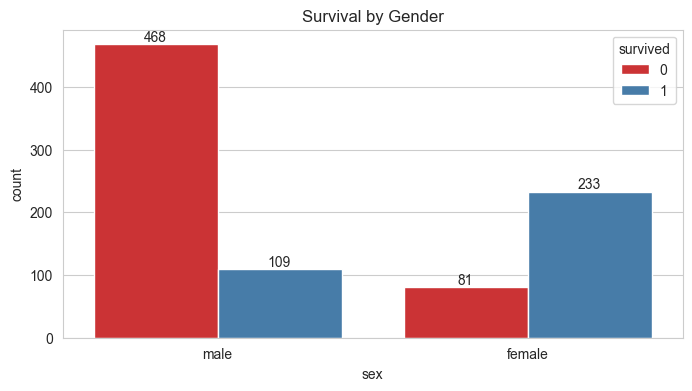

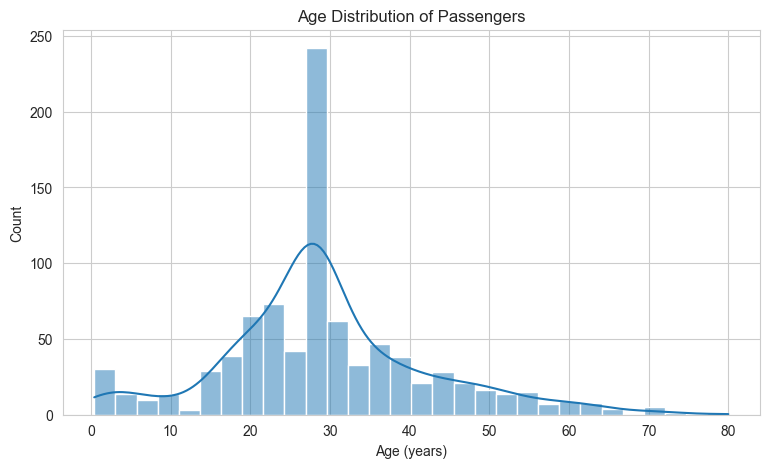

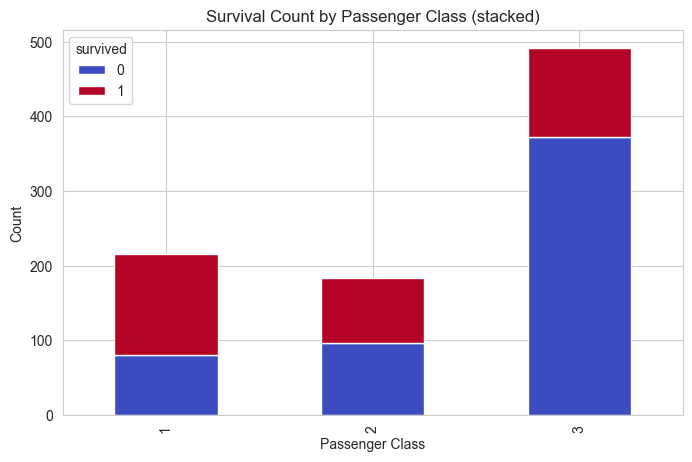

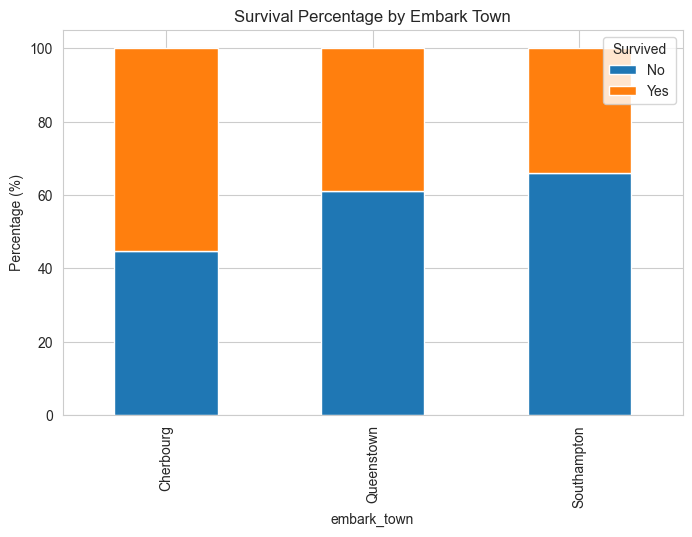

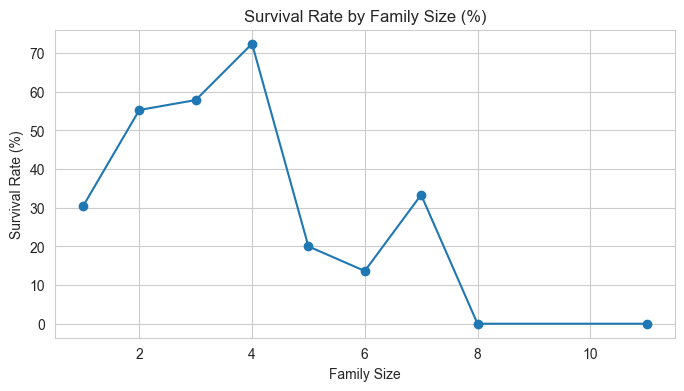

In [6]:

# ------------------------------------------------
# 6. Exploratory Data Analysis (EDA)
# ------------------------------------------------
import matplotlib.ticker as mtick

# 6.1 Survival Count
plt.figure(figsize=(6,4))
sns.countplot(x="survived", data=df, palette="Set2")
plt.title("Survival Count (0=Dead, 1=Survived)")
plt.savefig("survival_by_embark_town.png", dpi=300, bbox_inches="tight")
plt.savefig("survival_by_class.png", dpi=300, bbox_inches="tight")
plt.savefig("survival_by_gender.png", dpi=300, bbox_inches="tight")
plt.savefig("survival_count.png", dpi=300, bbox_inches="tight")
plt.xlabel("Survived")
plt.ylabel("Count")
plt.gca().yaxis.set_major_locator(plt.MaxNLocator(integer=True))
plt.show()

# 6.2 Survival by Gender (with percentages)
plt.figure(figsize=(8,4))
ax = sns.countplot(x="sex", hue="survived", data=df, palette="Set1")
plt.title("Survival by Gender")
plt.savefig("survival_by_embark_town.png", dpi=300, bbox_inches="tight")
plt.savefig("survival_by_class.png", dpi=300, bbox_inches="tight")
plt.savefig("survival_by_gender.png", dpi=300, bbox_inches="tight")
plt.savefig("survival_count.png", dpi=300, bbox_inches="tight")
for p in ax.patches:
    height = p.get_height()
    if height>0:
        ax.annotate(int(height), (p.get_x()+p.get_width()/2., height), ha='center', va='bottom')
plt.show()

# 6.3 Age Distribution (hist + KDE)
plt.figure(figsize=(9,5))
sns.histplot(df['age'], bins=30, kde=True)
plt.title("Age Distribution of Passengers")
plt.savefig("survival_by_embark_town.png", dpi=300, bbox_inches="tight")
plt.savefig("survival_by_class.png", dpi=300, bbox_inches="tight")
plt.savefig("survival_by_gender.png", dpi=300, bbox_inches="tight")
plt.savefig("survival_count.png", dpi=300, bbox_inches="tight")
plt.xlabel("Age (years)")
plt.show()

# 6.4 Survival by Passenger Class (stacked bar style)
pclass_survived = df.groupby(['pclass','survived']).size().unstack(fill_value=0)
pclass_survived.plot(kind='bar', stacked=True, figsize=(8,5), colormap='coolwarm')
plt.title("Survival Count by Passenger Class (stacked)")
plt.savefig("survival_by_embark_town.png", dpi=300, bbox_inches="tight")
plt.savefig("survival_by_class.png", dpi=300, bbox_inches="tight")
plt.savefig("survival_by_gender.png", dpi=300, bbox_inches="tight")
plt.savefig("survival_count.png", dpi=300, bbox_inches="tight")
plt.xlabel("Passenger Class")
plt.ylabel("Count")
plt.show()

# 6.5 Survival by Embark Town (percentage stacked)
embark_tab = pd.crosstab(df['embark_town'], df['survived'], normalize='index')*100
embark_tab.plot(kind='bar', stacked=True, figsize=(8,5))
plt.title("Survival Percentage by Embark Town")
plt.savefig("survival_by_embark_town.png", dpi=300, bbox_inches="tight")
plt.savefig("survival_by_class.png", dpi=300, bbox_inches="tight")
plt.savefig("survival_by_gender.png", dpi=300, bbox_inches="tight")
plt.savefig("survival_count.png", dpi=300, bbox_inches="tight")
plt.ylabel("Percentage (%)")
plt.legend(title='Survived', labels=['No','Yes'])
plt.show()

# 6.6 Family Size vs Survival (mean survival vs family size)
fam_surv = df.groupby('family_size')['survived'].mean()*100
plt.figure(figsize=(8,4))
fam_surv.plot(marker='o')
plt.title("Survival Rate by Family Size (%)")
plt.savefig("survival_by_embark_town.png", dpi=300, bbox_inches="tight")
plt.savefig("survival_by_class.png", dpi=300, bbox_inches="tight")
plt.savefig("survival_by_gender.png", dpi=300, bbox_inches="tight")
plt.savefig("survival_count.png", dpi=300, bbox_inches="tight")
plt.xlabel("Family Size")
plt.ylabel("Survival Rate (%)")
plt.grid(True)
plt.show()

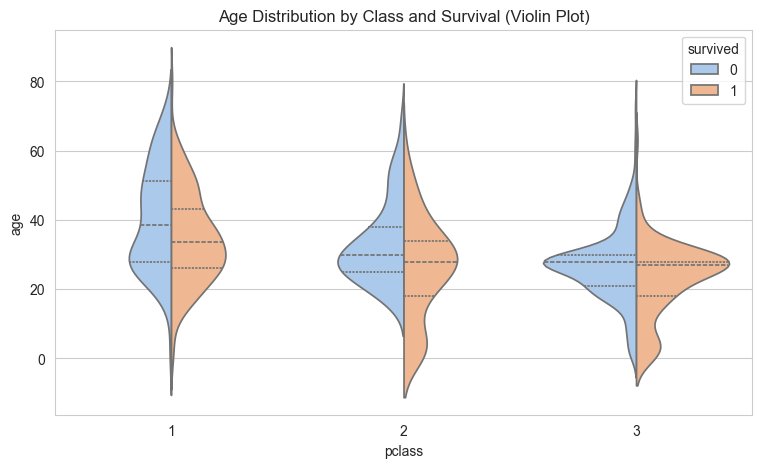

c:\Users\Atulya\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 12.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Atulya\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 19.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


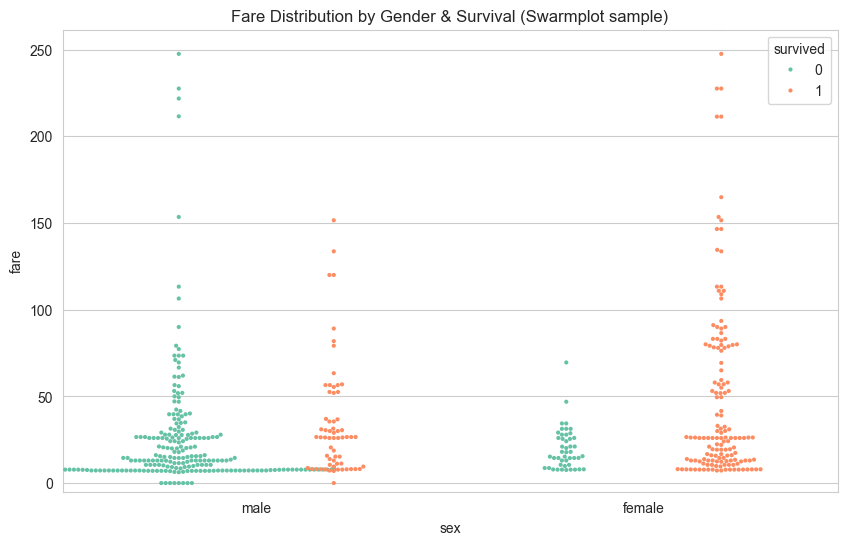

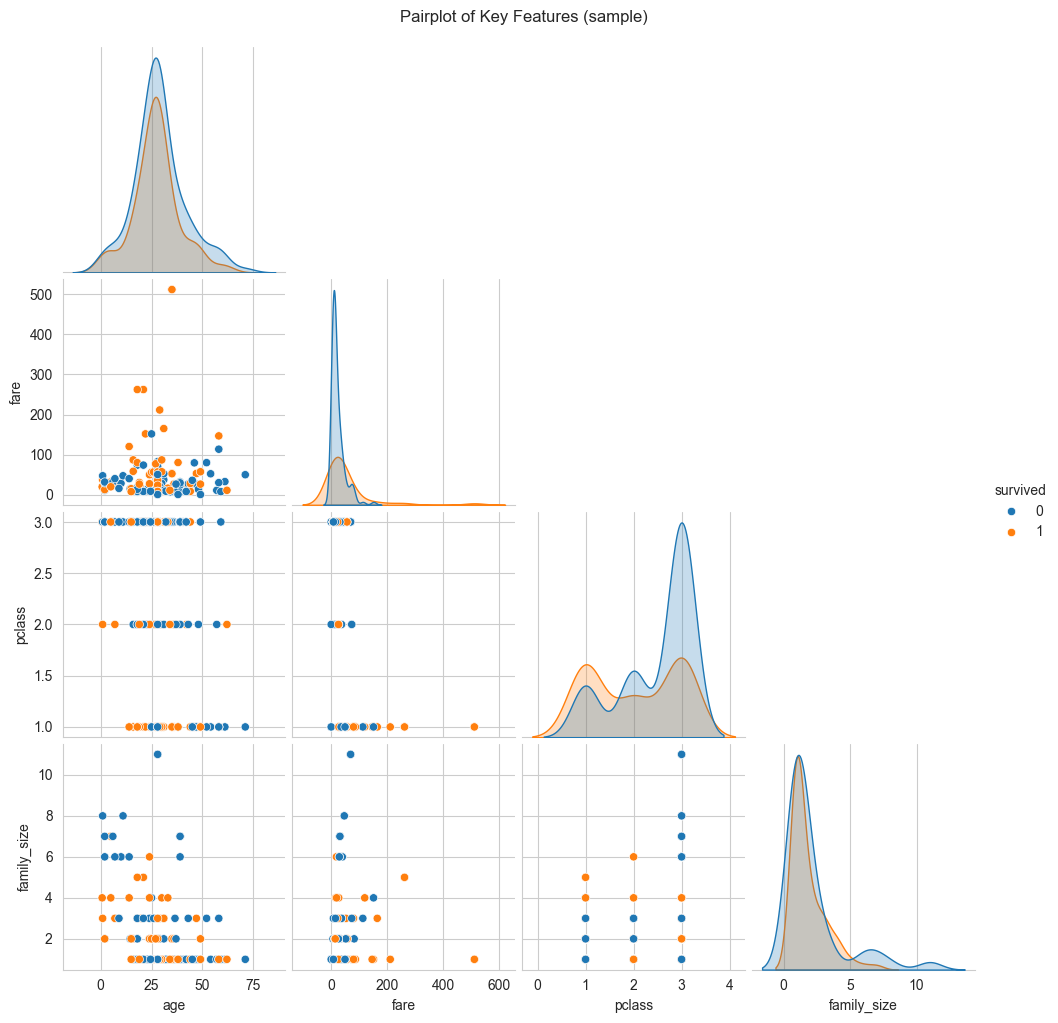

C:\Users\Atulya\AppData\Local\Temp\ipykernel_13924\1076997957.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="pclass", y="fare", data=df, palette="Set3")


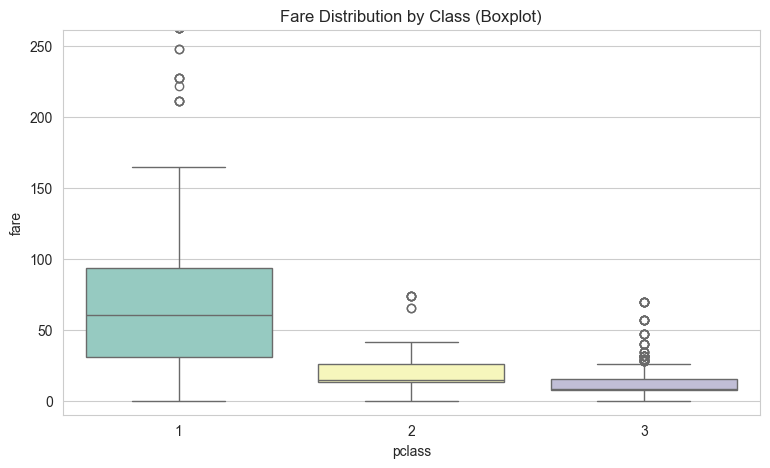

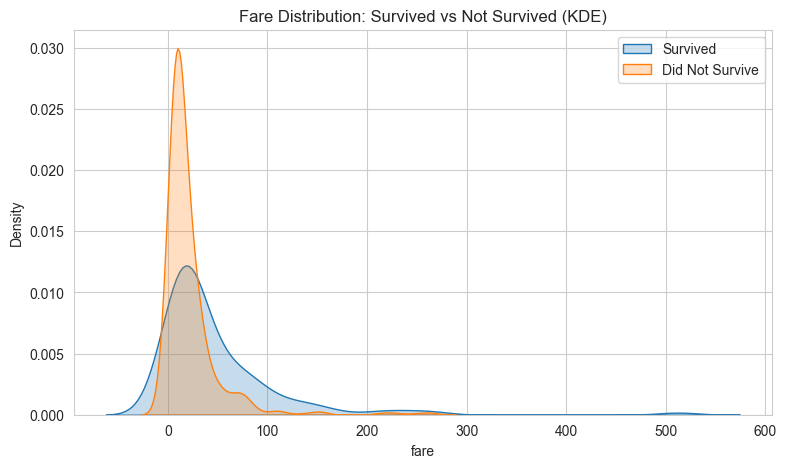

In [7]:

# ------------------------------------------------
# 7. Advanced Visualizations
# ------------------------------------------------
# 7.1 Violin Plot - Age by Class & Survival
plt.figure(figsize=(9,5))
sns.violinplot(x="pclass", y="age", hue="survived", data=df, split=True, palette="pastel", inner="quartile")
plt.title("Age Distribution by Class and Survival (Violin Plot)")
plt.savefig("pairplot_features.png", dpi=300, bbox_inches="tight")
plt.savefig("fare_swarm_gender.png", dpi=300, bbox_inches="tight")
plt.savefig("age_violin_class_survival.png", dpi=300, bbox_inches="tight")
plt.show()

# 7.2 Swarmplot - Fare by Gender & Survival (sample to avoid overplotting)
sample_df = df.sample(frac=0.6, random_state=42)
plt.figure(figsize=(10,6))
sns.swarmplot(x="sex", y="fare", data=sample_df, hue="survived", dodge=True, palette="Set2", size=3)
plt.ylim(-5, df['fare'].quantile(0.99)*1.05)
plt.title("Fare Distribution by Gender & Survival (Swarmplot sample)")
plt.savefig("pairplot_features.png", dpi=300, bbox_inches="tight")
plt.savefig("fare_swarm_gender.png", dpi=300, bbox_inches="tight")
plt.savefig("age_violin_class_survival.png", dpi=300, bbox_inches="tight")
plt.show()

# 7.3 Pairplot for Key Features (smaller sample for speed)
pp_sample = df[['survived','age','fare','pclass','family_size']].dropna().sample(n=200, random_state=1)
sns.pairplot(pp_sample, hue='survived', diag_kind='kde', corner=True)
plt.suptitle("Pairplot of Key Features (sample)", y=1.02)
plt.show()

# 7.4 Boxplot - Fare by Class
plt.figure(figsize=(9,5))
sns.boxplot(x="pclass", y="fare", data=df, palette="Set3")
plt.title("Fare Distribution by Class (Boxplot)")
plt.savefig("pairplot_features.png", dpi=300, bbox_inches="tight")
plt.savefig("fare_swarm_gender.png", dpi=300, bbox_inches="tight")
plt.savefig("age_violin_class_survival.png", dpi=300, bbox_inches="tight")
plt.ylim(-10, df['fare'].quantile(0.99)*1.05)
plt.show()

# 7.5 KDE Plot - Fare by Survival
plt.figure(figsize=(9,5))
sns.kdeplot(df[df['survived']==1]['fare'], label='Survived', fill=True)
sns.kdeplot(df[df['survived']==0]['fare'], label='Did Not Survive', fill=True)
plt.title("Fare Distribution: Survived vs Not Survived (KDE)")
plt.savefig("pairplot_features.png", dpi=300, bbox_inches="tight")
plt.savefig("fare_swarm_gender.png", dpi=300, bbox_inches="tight")
plt.savefig("age_violin_class_survival.png", dpi=300, bbox_inches="tight")
plt.legend()
plt.show()

In [8]:

# ------------------------------------------------
# 8. Group-Based Insights & Pivot Tables
# ------------------------------------------------
print("\nAverage Age by Class:\n", df.groupby('pclass')['age'].mean())
print("\nAverage Fare by Class:\n", df.groupby('pclass')['fare'].mean())
print("\nSurvival Rate by Gender (%):\n", df.groupby('sex')['survived'].mean()*100)
print("\nSurvival Rate by Class (%):\n", df.groupby('pclass')['survived'].mean()*100)
print("\nSurvival Rate by Age Group (%):\n", df.groupby('age_group')['survived'].mean()*100)

# Pivot: survival by class and gender
pivot_table = pd.pivot_table(df, values='survived', index='pclass', columns='sex', aggfunc=np.mean)
print("\nPivot Table - Survival by Class & Gender:\n", pivot_table)

# Crosstab: Embark town vs Survival
print("\nCrosstab - Embark Town vs Survival (counts):\n")
print(pd.crosstab(df['embark_town'], df['survived']))

# Crosstab normalized
print("\nCrosstab - Embark Town vs Survival (row-wise %):\n")
print(pd.crosstab(df['embark_town'], df['survived'], normalize='index')*100)



Average Age by Class:
 pclass
1    36.812130
2    29.765380
3    25.932627
Name: age, dtype: float64

Average Fare by Class:
 pclass
1    84.154687
2    20.662183
3    13.675550
Name: fare, dtype: float64

Survival Rate by Gender (%):
 sex
female    74.203822
male      18.890815
Name: survived, dtype: float64

Survival Rate by Class (%):
 pclass
1    62.962963
2    47.282609
3    24.236253
Name: survived, dtype: float64

Survival Rate by Age Group (%):
 age_group
Child          57.971014
Teen           42.857143
Young Adult    35.327103
Middle Age     39.869281
Senior         34.375000
Name: survived, dtype: float64

Pivot Table - Survival by Class & Gender:
 sex       female      male
pclass                    
1       0.968085  0.368852
2       0.921053  0.157407
3       0.500000  0.135447

Crosstab - Embark Town vs Survival (counts):

survived       0    1
embark_town          
Cherbourg     75   93
Queenstown    47   30
Southampton  427  219

Crosstab - Embark Town vs Survival (ro

C:\Users\Atulya\AppData\Local\Temp\ipykernel_13924\3060528643.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print("\nSurvival Rate by Age Group (%):\n", df.groupby('age_group')['survived'].mean()*100)
C:\Users\Atulya\AppData\Local\Temp\ipykernel_13924\3060528643.py:11: FutureWarning: The provided callable <function mean at 0x000001853F5984C0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pivot_table = pd.pivot_table(df, values='survived', index='pclass', columns='sex', aggfunc=np.mean)


In [9]:

# ------------------------------------------------
# 9. NumPy - Deeper Statistical Analysis
# ------------------------------------------------
ages = df['age'].to_numpy()
fares = df['fare'].to_numpy()
family = df['family_size'].to_numpy()

print("Age - mean: {:.2f}, median: {:.2f}, std: {:.2f}, skew: {:.2f}".format(np.mean(ages), np.median(ages), np.std(ages), pd.Series(ages).skew()))
print("Fare - mean: {:.2f}, median: {:.2f}, std: {:.2f}, skew: {:.2f}".format(np.mean(fares), np.median(fares), np.std(fares), pd.Series(fares).skew()))
print("Family Size - mean: {:.2f}, max: {}, unique counts:\n".format(np.mean(family), np.max(family)), pd.Series(family).value_counts().sort_index())


Age - mean: 29.36, median: 28.00, std: 13.01, skew: 0.51
Fare - mean: 32.20, median: 14.45, std: 49.67, skew: 4.79
Family Size - mean: 1.90, max: 11, unique counts:
 1     537
2     161
3     102
4      29
5      15
6      22
7      12
8       6
11      7
Name: count, dtype: int64


In [10]:

# ------------------------------------------------
# 10. Advanced Aggregations & Custom Analysis
# ------------------------------------------------
# Top 5 fares and details
print("\nTop 5 fares:")
display(df.sort_values('fare', ascending=False).head())

# Survival probability by combined features (pclass + sex)
combo = df.groupby(['pclass','sex'])['survived'].mean().unstack()*100
print("\nSurvival Probability (%) by Class and Sex:\n", combo)

# Average fare paid by survivors vs non-survivors across classes
avg_fare_survived = df.groupby(['pclass','survived'])['fare'].mean().unstack()
print("\nAverage Fare by Class and Survival:\n", avg_fare_survived)



Top 5 fares:


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,family_size,age_group
679,1,1,male,36.0,0,1,512.3292,C,First,man,True,Cherbourg,yes,0,2,Middle Age
258,1,1,female,35.0,0,0,512.3292,C,First,woman,False,Cherbourg,yes,1,1,Young Adult
737,1,1,male,35.0,0,0,512.3292,C,First,man,True,Cherbourg,yes,1,1,Young Adult
88,1,1,female,23.0,3,2,263.0000,S,First,woman,False,Southampton,yes,0,6,Young Adult
438,0,1,male,64.0,1,4,263.0000,S,First,man,True,Southampton,no,0,6,Senior



Survival Probability (%) by Class and Sex:
 sex        female       male
pclass                      
1       96.808511  36.885246
2       92.105263  15.740741
3       50.000000  13.544669

Average Fare by Class and Survival:
 survived          0          1
pclass                        
1         64.684007  95.608029
2         19.412328  22.055700
3         13.669364  13.694887


In [11]:

# ------------------------------------------------
# 11. Export Cleaned Dataset & Save Figures
# ------------------------------------------------
# Save cleaned CSV (optional)
cleaned_path = "titanic_cleaned.csv"
df.to_csv(cleaned_path, index=False)
print(f"Cleaned dataset saved to: {cleaned_path}")

# Example: save a figure (re-create a plot and save)
plt.figure(figsize=(6,4))
sns.countplot(x="survived", data=df, palette="Set2")
plt.title("Survival Count (saved figure example)")
plt.savefig("survival_count.png", dpi=300, bbox_inches="tight")
plt.savefig("survival_count.png", bbox_inches='tight', dpi=150)
print("Example figure saved as survival_count.png in the working directory.")
plt.close()

Cleaned dataset saved to: titanic_cleaned.csv


C:\Users\Atulya\AppData\Local\Temp\ipykernel_13924\774402460.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="survived", data=df, palette="Set2")


Example figure saved as survival_count.png in the working directory.



# Conclusion & Key Takeaways

- Women had a much higher survival rate than men.
- First class passengers had the highest survival rate; higher fare correlated with better survival.
- Passengers traveling with family (larger family_size) tended to have different survival probabilities than those traveling alone.
- Younger age groups (Children/Teen) showed higher survival ratios in many cases.
- Embark town and passenger class influenced survival probability.
- The cleaned dataset and visual assets are saved in the working directory (`titanic_cleaned.csv`, `survival_count.png`).